Before we start, let's check that nilearn is well installed

In [3]:
import nilearn

In [2]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

## A Glance at NeuroImaging data

Brain imaging data is made of 3D or 4D (3D + time) images which can be stored in "Nifti" files (.nii)

In [4]:
# Let's use a Nifti file that is shipped with nilearn:
# a canonical brain template, called the MNI152
from nilearn import datasets

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: {}'.format(datasets.MNI152_FILE_PATH))

Path to MNI152 template: /home/varoquau/dev/nilearn/nilearn/datasets/data/avg152T1_brain.nii.gz


In the above, MNI152_FILE_PATH is nothing more than a string with a path pointing to a nifti image. Right below, we visualize it.

You can replace it with a string pointing to a file on your disk. Note that it should be a 3D volume, and not a 4D volume.

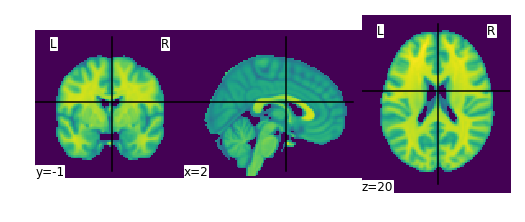

In [5]:
from nilearn import plotting
%matplotlib inline

plotting.plot_img(datasets.MNI152_FILE_PATH)

We can also have an interactive visualization of the 3D data: try clicking on the visualization below

/home/varoquau/dev/nilearn/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



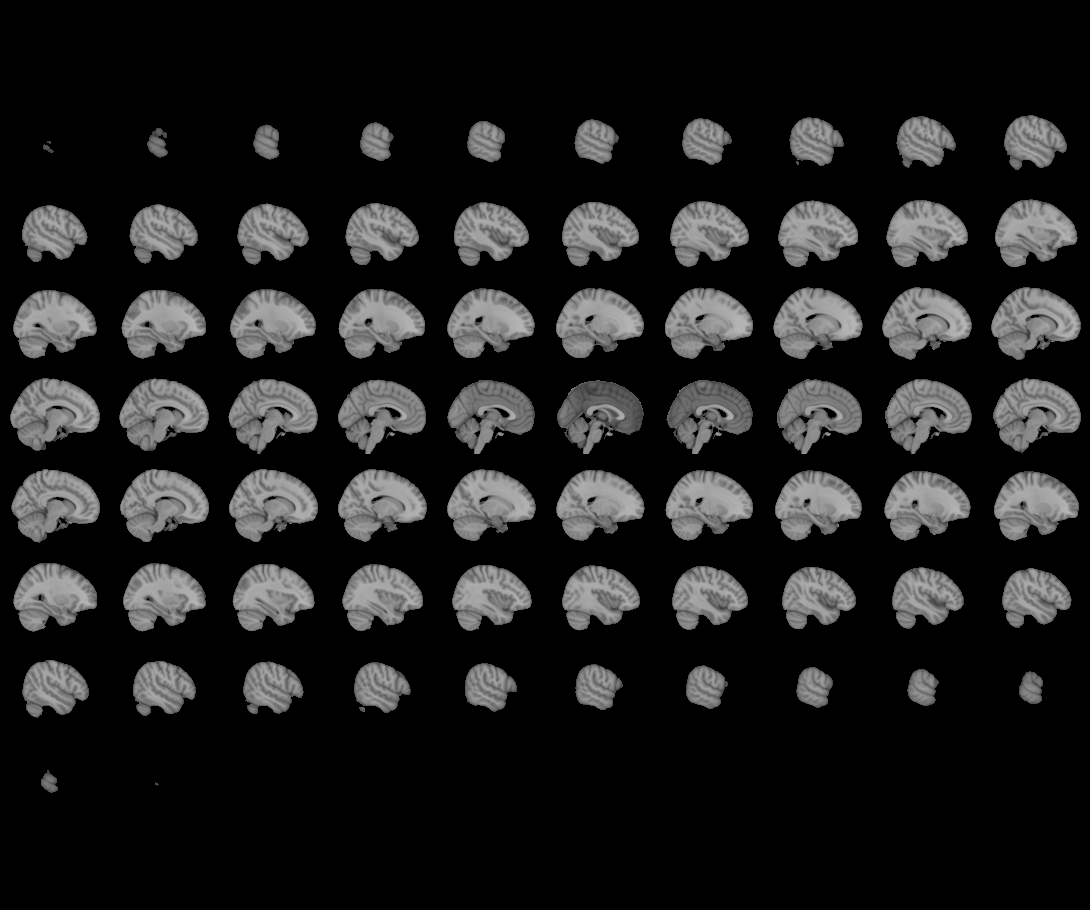
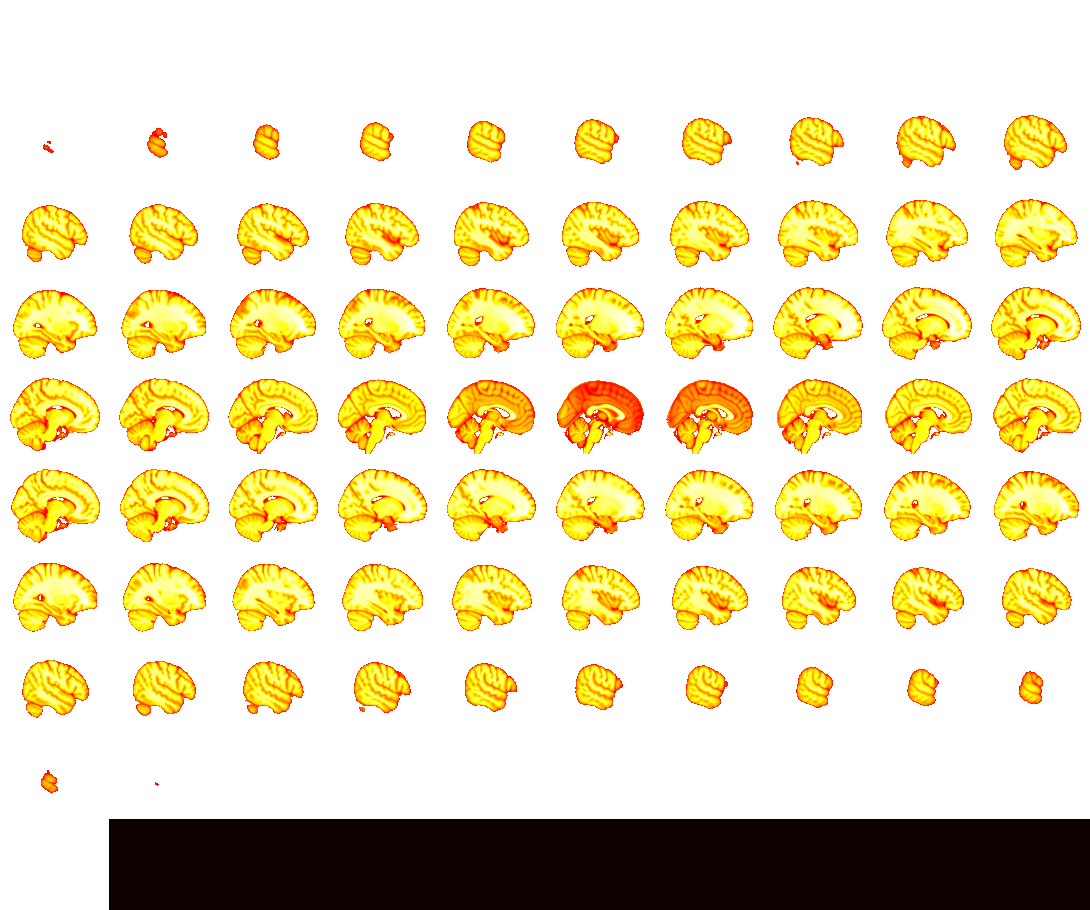

In [6]:
plotting.view_img(datasets.MNI152_FILE_PATH)

For more visualization, there is a whole section of the [Nilearn documentation](http://nilearn.github.io/plotting/index.html#plotting) on making pretty plots for neuroimaging data!

## [Understanding neuroimaging data](http://nilearn.github.io/manipulating_images/input_output.html)

### Brain-imaging data: Nifti images

For volumetric data, nilearn works with data stored in the [Nifti structure](http://nipy.org/nibabel/nifti_images.html) (via the [nibabel package](http://nipy.org/nibabel/)).

The Nifti data structure (also used in Analyze files) is the standard way of sharing data in neuroimaging research. The main components are:

  * data:	raw scans in form of a numpy array:  
    `data = img.get_data()`
  * affine:	returns the transformation matrix that maps from voxel indices of the `numpy` array to actual real-world     locations of the brain:  
    `affine = img.affine`

It is important to appreciate that the representation of MRI data we'll be using is a big 4D matrix representing (3D MRI + 1D for time), stored in a single Nifti file.

### Niimg-like objects

Nilearn functions take as input argument what we call "Niimg-like objects":

Niimg: A Niimg-like object can be one of the following:

  * A string with a file path to a Nifti image
  * A SpatialImage from `nibabel`, i.e., an object exposing the get_data() method and affine attribute, typically a Nifti1Image from `nibabel`.

Niimg-4D: Similarly, some functions require 4D Nifti-like data, which we call Niimgs or Niimg-4D. Accepted input arguments are:

  * A path to a 4D Nifti image
  * List of paths to 3D Nifti images
  * 4D Nifti-like object
  * List of 3D Nifti-like objects

**Note:** If you provide a sequence of Nifti images, all of them must have the same affine !

## [Manipulating data](http://nilearn.github.io/auto_examples/plot_nilearn_101.html#sphx-glr-auto-examples-plot-nilearn-101-py)

We can also directly manipulate these images using Nilearn ! As an example, let's try smoothing this image.

In [6]:
from nilearn import image
smooth_anat_img = image.smooth_img(datasets.MNI152_FILE_PATH, fwhm=6)

# While we are giving a file name as input, the function returns
# an in-memory object:
print(smooth_anat_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8186.02001953125
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : mni


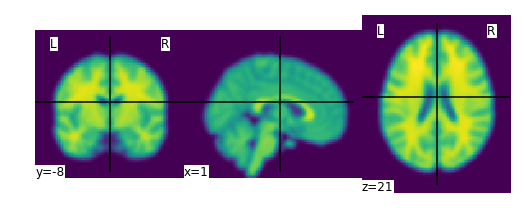

In [7]:
plotting.plot_img(smooth_anat_img)

We can then save this manipulated image from in-memory to disk as follows:

In [8]:
# smooth_anat_img.to_filename('smooth_anat_img.nii.gz')
# os.getcwd()  # We'll' check our "current working directory" (cwd) to see where the file was saved

## [Visualizing neuroimaging volumes](https://nilearn.github.io/auto_examples/01_plotting/plot_visualization.html#visualization)

What if we want to view not a structural MRI image, but a functional one ?

Let's first retrieve data from internet:

In [8]:
data = datasets.fetch_haxby()

In [10]:
fmri_filename = data.func[0]
plotting.plot_epi(fmri_filename)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

Uh-oh, what happened ?! Let's look back at the error message:

> DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

We can fix that ! Let's take an average of the EPI image and plot that instead:


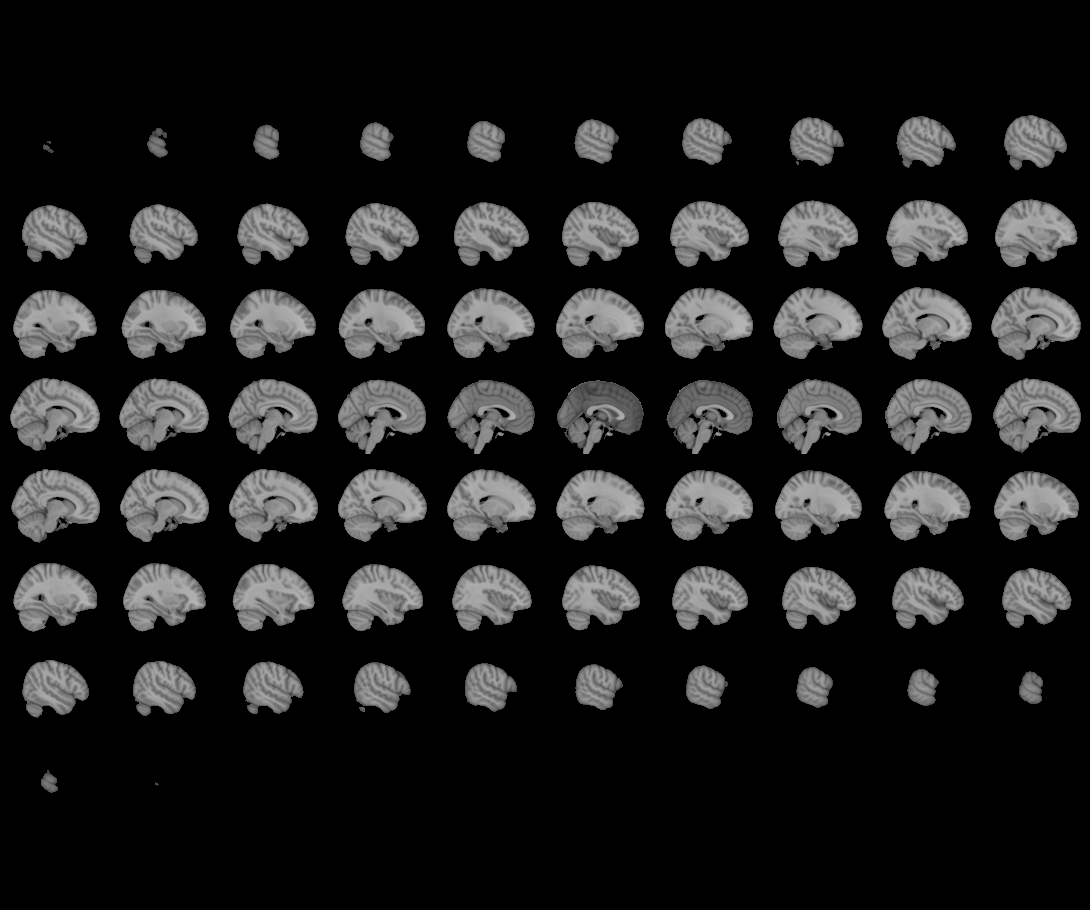
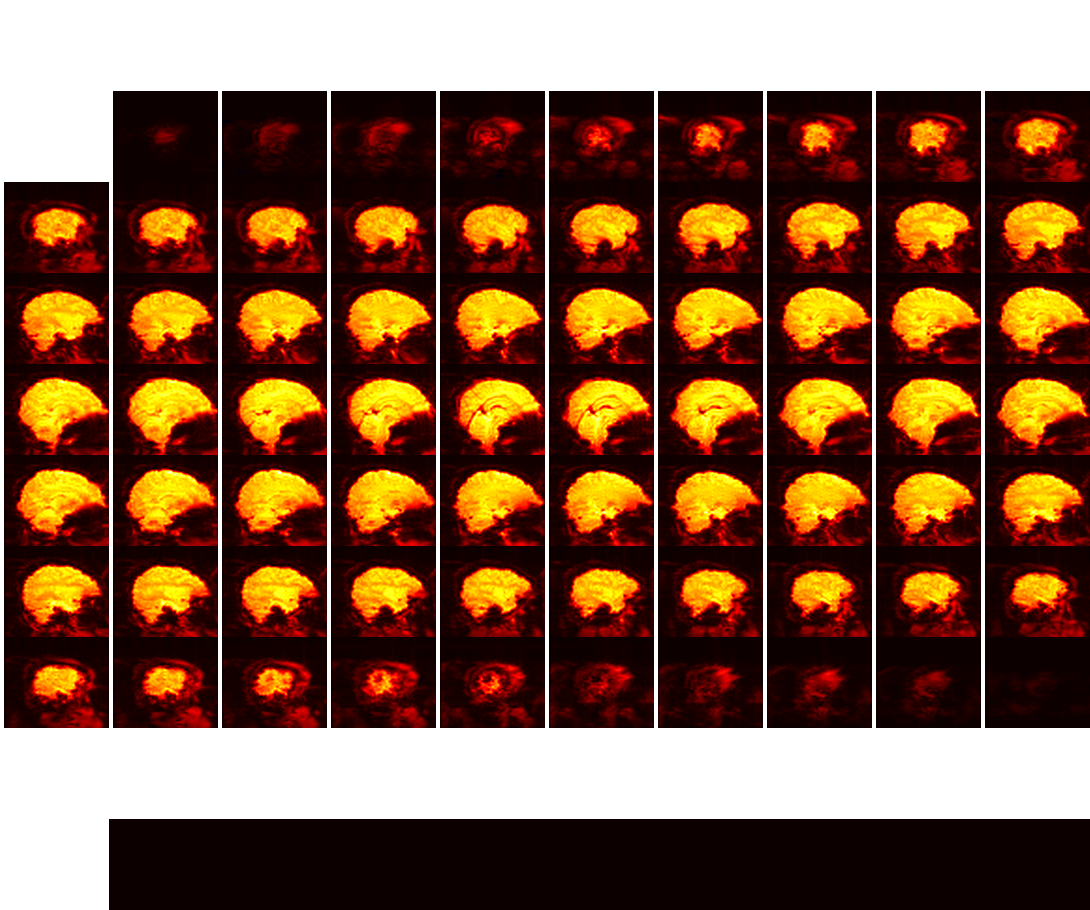

In [11]:
from nilearn.image import mean_img

plotting.view_img(mean_img(fmri_filename), threshold=None)

## [Feature extraction: from fMRI volumes to a data matrix](http://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#convert-the-fmri-volume-s-to-a-data-matrix)

These are some really lovely images, but for machine learning we want matrices so that we can use all of the techniques we learned this morning !

To transform our Nifti images into matrices, we'll use the `nilearn.input_data.NiftiMasker` to extract the fMRI data from a mask and convert it to data series.

The NiftiMasker is first fit on data, to try to find a brain mask:

In [12]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(standardize=True)
masker.fit(data.func[0])

NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
            mask_args=None, mask_img=None, mask_strategy='background',
            memory=Memory(location=None), memory_level=1, reports=True,
            sample_mask=None, sessions=None, smoothing_fwhm=None,
            standardize=True, t_r=None, target_affine=None, target_shape=None,
            verbose=0)

We can have a look at a report to see the mask computed by the NiftiMasker

In [13]:
masker.generate_report()

/usr/lib/python3/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,None
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


As visible above: no brain mask was extracted. This is because the "mask_strategy" was set to "background", and the brain does not stand out clearly from the background. Let's fix this and put it to "epi", as this is an EPI image.

In [14]:
masker = NiftiMasker(standardize=True, mask_strategy='epi')
masker.fit(data.func[0])
masker.generate_report()

Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1
reports,True


That looks better!

We can now proceed and extract signals.

In [15]:
# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn !
fmri_masked = masker.transform(fmri_filename)
print(fmri_masked)

[[-2.3201926  -2.4763186  -1.4677662  ... -1.8403709  -1.2252955
   0.34676555]
 [-2.0238152  -2.5594273  -1.4677662  ... -1.6986073  -1.2026424
   0.40683946]
 [-2.3498302  -2.0192206  -1.5579532  ... -1.5332165  -1.2479486
   0.32273597]
 ...
 [-0.21591368 -0.39860114  0.6816932  ... -0.8243987  -1.066724
  -1.0950085 ]
 [-0.18627596 -0.31549245  0.501319   ... -0.49361706 -0.77223366
  -1.0950085 ]
 [-0.0380873  -0.19082941  0.6065373  ... -0.13920817 -0.9081522
  -1.1670972 ]]


In [14]:
print(fmri_masked.shape)

(168, 228453)


One way to think about what just happened is to look at it visually:

![](http://nilearn.github.io/_images/masking.jpg)

Essentially, we can think about overlaying a 3D grid on an image. Then, our mask tells us which cubes or "voxels" (like 3D pixels) to sample from. Since our Nifti images are 4D files, we can't overlay a single grid -- instead, we use a series of 3D grids (one for each volume in the 4D file), so we can get a measurement for each voxel at each timepoint. These are reflected in the shape of the matrix ! You can check this by checking the number of positive voxels in our brain mask.

There are many other strategies in Nilearn [for masking data and for generating masks](http://nilearn.github.io/manipulating_images/manipulating_images.html#computing-and-applying-spatial-masks). I'd encourage you to spend some time exploring the documentation for these !

We can also [display this time series](http://nilearn.github.io/auto_examples/03_connectivity/plot_adhd_spheres.html#display-time-series) to get an intuition of how the whole brain signal is changing over time.

We'll display the first three voxels by sub-selecting values from the matrix. You can also find more information on [how to slice arrays here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html#basic-slicing-and-indexing).

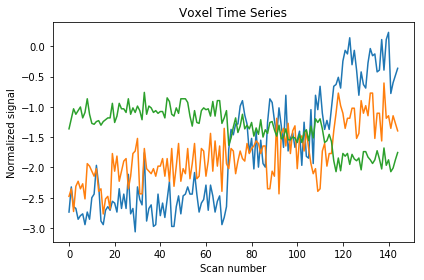

In [16]:
import matplotlib.pyplot as plt
plt.plot(fmri_masked[5:150, :3])

plt.title('Voxel Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

## Machine-learning: predicting mental processes

Now that the brain images are converted to a data matrix, we can apply machine-learning to them, for instance to predict the task that the subject was doing.

### The behavioral data

For this, we need the behavioral data:

In [17]:
data.session_target

['/home/varoquau/nilearn_data/haxby2001/subj2/labels.txt']

In [20]:
import pandas
behavioral = pandas.read_csv(data.session_target[0], delimiter=' ')
behavioral

,labels,chunks
0,rest,0
1,rest,0
2,rest,0
3,rest,0
4,rest,0
5,rest,0
6,scissors,0
7,scissors,0
8,scissors,0
9,scissors,0


The task was a visual-recognition task, and the labels denote the experimental condition: the type of object that was presented to the subject. This is what we are going to try to predict

In [26]:
conditions = behavioral['labels']

### A predictive model

We can now use our standard machine-learning tools to build predictive models on this data

In [35]:
%%time
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(fmri_masked, conditions)

CPU times: user 1min 16s, sys: 735 ms, total: 1min 17s
Wall time: 1min 17s


We can then predict the labels from the data

In [29]:
prediction = svc.predict(fmri_masked)
print(prediction)

['rest' 'rest' 'rest' ... 'rest' 'rest' 'rest']


Let's measure the error rate:

In [30]:
print((prediction == conditions).sum() / float(len(conditions)))

1.0


This error rate is meaningless. Why?

### Cross-validation

We need to use cross-validation:

In [31]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(svc, fmri_masked, conditions)
print(cv_score)

[0.56462585 0.70748299 0.63265306 0.64912281 0.55438596]


The fMRI data is acquired by sessions, and the noise is autocorrelated in a given session. Hence, it is better to predict across sessions when doing cross-validation

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
cv = LeaveOneGroupOut()
cv_score = cross_val_score(svc,
                           fmri_masked,
                           conditions,
                           cv=cv,
                           groups=behavioral['chunks'],
                           )
print(cv_score)